In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


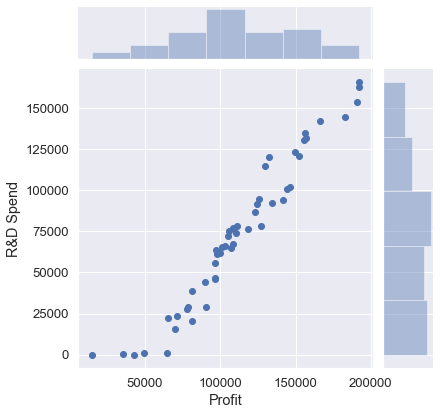

In [5]:
sns.jointplot(x='Profit', y='R&D Spend', data=df)

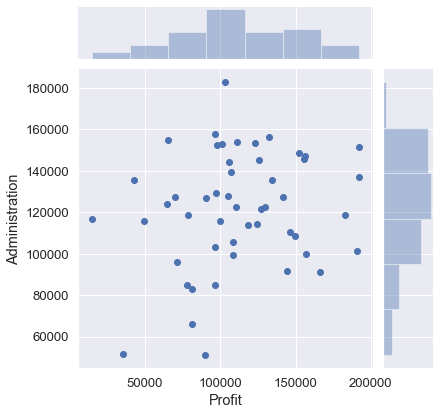

In [6]:
sns.jointplot(x='Profit', y='Administration', data=df)

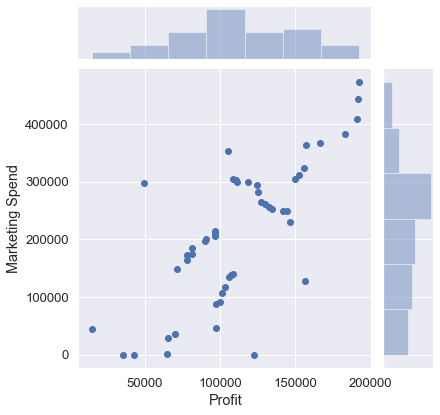

In [7]:
sns.jointplot(x='Profit', y='Marketing Spend', data=df)

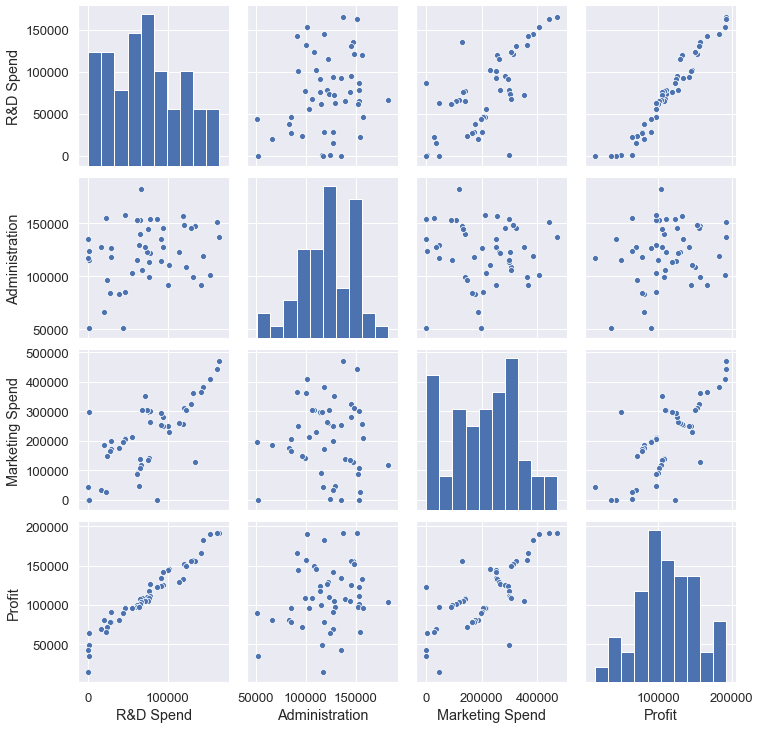

In [17]:
sns.pairplot(df)

## Simple Linear Regression

In [9]:
x = df['Profit'].values.reshape(-1, 1)
y = df['R&D Spend']

In [10]:
x

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
x_train.shape

(35, 1)

In [13]:
x_test.shape

(15, 1)

In [14]:
y_train.shape

(35,)

In [15]:
y_test.shape

(15,)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = model.predict(x_test)
y_pred

array([ 98919.3951207 ,  39538.8916565 ,  60629.84967292,  21625.36423746,
        88963.17483066, -10963.49985218,  67086.81332173,  68948.1638966 ,
        57833.86894197,  86073.88148051, 107027.62226548, 134435.88693522,
        49502.24185059, 118865.76958785, 153056.13267133])

In [20]:
y_test

13     91992.39
39     38558.51
30     61994.48
45      1000.23
17     94657.16
48       542.05
26     75328.87
25     64664.71
32     63408.86
19     86419.70
12     93863.75
4     142107.34
37     44069.95
8     120542.52
3     144372.41
Name: R&D Spend, dtype: float64

In [21]:
model.score(x_train, y_train)

0.9424156952355436

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(y_test, y_pred)

73223247.56529252

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

8557.058347662036

In [27]:
model.predict([[7.5]])

array([-50697.01797629])

In [28]:
model.predict([[15]])

array([-50688.66261999])

In [29]:
model.coef_

array([1.11404751])

In [30]:
model.intercept_

-50705.373332596544

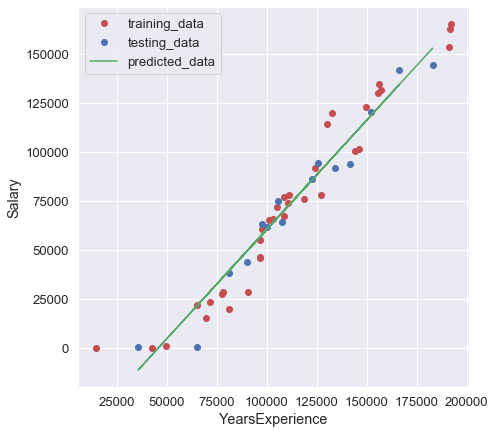

In [31]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g-', label='predicted_data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

## Multiple Regression

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [38]:
x = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred = model.predict(x_test)
y_pred

array([125972.1482631 ,  85471.92270964,  98924.15168288,  46639.7862872 ,
       128142.12473185,  52602.19053671, 108364.69760175, 100331.58846892,
        97538.56674666, 112496.70398401, 128110.85388838, 173383.29618108,
        93334.03668271, 149432.23776236, 173293.94964905])

In [42]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [43]:
model.score(x_train, y_train)

0.9508557563847194

In [44]:
model.score(x_test, y_test)

0.9418819530700167

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

9042.795443637518

# Polynomial Regression

In [48]:
poly = PolynomialFeatures(degree=5)

In [49]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [50]:
x_train

,R&D Spend,Administration,Marketing Spend
6,134615.46,147198.87,127716.82
41,27892.92,84710.77,164470.71
46,1315.46,115816.21,297114.46
47,0.00,135426.92,0.00
15,114523.61,122616.84,261776.23
9,123334.88,108679.17,304981.62
16,78013.11,121597.55,264346.06
24,77044.01,99281.34,140574.81
34,46426.07,157693.92,210797.67
31,61136.38,152701.92,88218.23


In [51]:
x_train_poly

array([[1.00000000e+00, 1.34615460e+05, 1.47198870e+05, ...,
        4.51391360e+25, 3.91648856e+25, 3.39813386e+25],
       [1.00000000e+00, 2.78929200e+04, 8.47107700e+04, ...,
        3.19258861e+25, 6.19858981e+25, 1.20349097e+26],
       [1.00000000e+00, 1.31546000e+03, 1.15816210e+05, ...,
        3.51811526e+26, 9.02535936e+26, 2.31536222e+27],
       ...,
       [1.00000000e+00, 1.19943240e+05, 1.56547420e+05, ...,
        4.13637174e+26, 6.77770859e+26, 1.11057073e+27],
       [1.00000000e+00, 6.60515200e+04, 1.82645560e+05, ...,
        5.50173372e+25, 3.55891452e+25, 2.30216023e+25],
       [1.00000000e+00, 2.02295900e+04, 6.59479300e+04, ...,
        2.76556062e+25, 7.76918797e+25, 2.18256947e+26]])

In [52]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = model.predict(x_test_poly)
y_pred

array([ 272098.16038086,   94472.99466467,   33552.46625084,
         88543.97911046,  327440.24459998,  105772.7136822 ,
         81890.31110445,  259046.89585914,  187563.60388725,
       5207713.04131933,  193625.67903459,  563406.71844776,
        128294.87481275,  317467.27270295,   15637.92595239])

In [54]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [55]:
model.score(x_train_poly, y_train)

0.9999999999999999

In [56]:
model.score(x_test_poly, y_test)

-1239.2450889804868

In [57]:
np.sqrt(mean_squared_error(y_test, y_pred))

1320994.34715816